## Problem 1

1. $$\frac{\partial}{\partial t}p(x,t) = D \frac{\partial^2}{\partial x^2}p(x, t),\ p(0, t) = p(\infty, t) = 0,\ p(x, 0) = \delta(x-x_0)$$
2. Find the Fourier Transforms of rhs $$FT\left\{Dp_{xx}\right\} = D\int_{-\infty}^{\infty} p_{xx}(x,t)e^{-i2\pi yx}dx = (2i\pi y)^2 D\int_{-\infty}^{\infty} p(x,t)e^{-i2\pi yx}dx = (2i\pi y)^2 D P(y,t)$$
and lhs $$FT\left\{p_{t}\right\} = \int_{-\infty}^{\infty} p_{t}(x,t)e^{-i2\pi yx}dx = \frac{\partial}{\partial t}\int_{-\infty}^{\infty} p(x,t)e^{-i2\pi yx}dx =\frac{\partial}{\partial t} P(y,t) $$
put them both in the equation $$\frac{\partial}{\partial t} P(y,t) = -4\pi^2y^2 D P(y,t) \Rightarrow P(y,t) = P(y, 0)e^{-4\pi^2y^2 Dt}, $$
where $P(y, 0) = FT\left\{\delta(x-x_0)\right\} $. Finally
$$ p(x,t) = FT^{-1}\left\{P(y, 0)e^{-4\pi^2y^2 Dt}\right\},\ FT^{-1}\left\{e^{-4\pi^2y^2 Dt}\right\} = \frac{1}{\sqrt{4\pi D t}}e^{-\frac{x^2}{4Dt}} \Rightarrow$$
$$ p(x,t) = \int_{-\infty}^{\infty} \delta(z-x_0)  \frac{1}{\sqrt{4\pi D t}}e^{-\frac{(z-x)^2}{4Dt}}dz = \frac{1}{\sqrt{4\pi D t}}e^{-\frac{(x_0-x)^2}{4Dt}}$$
3. $$s(t) = \int_0^{\infty} \frac{1}{\sqrt{4\pi D t}}e^{-\frac{(x_0-x)^2}{4Dt}} dx =\frac{1}{2}\mathbf{erf} \frac{-x_0}{2\sqrt{Dt}}$$

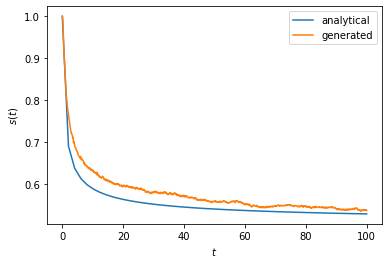

In [44]:
from scipy import special, stats
import matplotlib.pyplot as plt
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    x0 = np.asarray(x0)
    r = stats.norm.rvs(size=x0.shape + (n,), scale=delta*np.sqrt(dt))
    if out is None:
        out = np.empty(r.shape) 
    np.cumsum(r, axis=-1, out=out)
    out += np.expand_dims(x0, axis=-1)

    return out

x_0 = 1
D = 1
T = 100
N = 1000
dt = T/N
m = 10000
x = np.empty((m,N+1))
x[:, 0] = x_0
brownian(x[:,0], N, dt, D, out=x[:,1:])
t = np.linspace(0+1e-8, T)
plt.plot(t, 0.5*special.erfc(-x_0 / 2 / np.sqrt(D * t)), label='analytical')
plt.plot(np.linspace(0.0, N*dt, N+1), [len(x[:, i][x[:, i] > 0]) / m for i in range(N+1)], label='generated')
plt.xlabel('$t$')
plt.ylabel('$s(t)$')
plt.legend()
plt.show()

## Problem 2
1. $$\langle x(t) \rangle = \int_0^t ds\langle v_0 \cos{\theta(s)} \rangle = \int_0^t v_0 ds\int_{-\infty}^{\infty} d\theta \cos{\theta(s)} \frac{1}{\sqrt{4\pi D_R s}} e^{\frac{-\theta^2(s)}{4D_R s}} = \frac{v_0}{D_R}(1 - e^{-D_R t})$$
from the lecture:
$$\langle y(t) \rangle = 0$$
$$\langle x^2(t) \rangle = \int_0^t ds_1 \int_0^t ds_2 \langle v_0^2 \cos{\theta(s_1)}\cos{\theta(s_2)} \rangle = \int_0^t ds_1 \int_0^t ds_2 \frac{v_0^2}{2}\left[e^{-D_R |s_1-s_2|} + e^{-D_R(s_1 + s_2 + 2 min(s_1, s_2))}\right] = \frac{v_0^2}{D_R}t + \frac{v_0^2}{D_R^2}\left[\frac{e^{-4D_Rt}}{12} + \frac{2}{3}e^{-D_Rt} - \frac{3}{4}\right]$$
$$\langle y^2(t) \rangle = \int_0^t ds_1 \int_0^t ds_2 \langle v_0^2 \sin{\theta(s_1)}\sin{\theta(s_2)} \rangle = \int_0^t ds_1 \int_0^t ds_2 \frac{v_0^2}{2}\left[e^{-D_R |s_1-s_2|} - e^{-D_R(s_1 + s_2 + 2 min(s_1, s_2))}\right] = \frac{v_0^2}{D_R}t - \frac{v_0^2}{D_R^2}\left[\frac{e^{-4D_Rt}}{12} - \frac{4}{3}e^{-D_Rt} + \frac{5}{4}\right]$$

3. $$t \rightarrow 0: \langle x(t) \rangle = 0,\ \langle y(t) \rangle = 0,\ \langle x^2(t) \rangle = 0,\ \langle y^2(t) \rangle = 0$$
$$t \rightarrow \infty: \langle x(t) \rangle = \frac{v_0}{D_R},\ \langle y(t) \rangle = 0,\ \langle x^2(t) \rangle = O(t)\rightarrow \infty,\ \langle y^2(t) \rangle = O(t)\rightarrow \infty$$

## Problem 3
1. $$_0D_x^{\alpha} x^3 = \frac{1}{\Gamma(1-\alpha)} \frac{d}{dx} \int_0^x \frac{t^3}{(x - t)^{\alpha}} dt  = \frac{1}{\Gamma(1-\alpha)} \frac{d}{dx} x^{4 - \alpha} \int_0^1 t^3 (1-t)^{-\alpha} dt = \frac{1}{\Gamma(1-\alpha)} \frac{d}{dx} x^{4 - \alpha} B(4, 1 - \alpha) = \frac{\Gamma(4)}{\Gamma(5-\alpha)} (4-\alpha) x^{3 - \alpha}$$

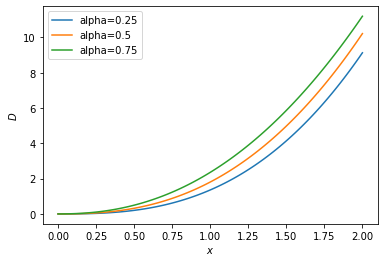

In [47]:
from scipy import special

x = np.linspace(0, 2, 100)
for alpha in [0.25,0.5,0.75]:
    plt.plot(x, special.gamma(4) / special.gamma(5 - alpha) * (4 - alpha) * (x**(3 - alpha)), label=f'alpha={alpha}')

plt.xlabel('$x$')
plt.ylabel('$D$')
plt.legend()
plt.show()

2. $$\alpha < 1,\ _0D_x^{\alpha} e^x = \frac{1}{\Gamma(1-\alpha)} \frac{d}{dx} \int_0^x \frac{e^t}{(x - t)^{\alpha}} dt  =  \frac{1}{\Gamma(1-\alpha)} \left(x^{-\alpha} + e^x  \int_0^x t^{-\alpha}e^{-t} dt\right) $$
$$\alpha = 1,\ _0D_x^{1} e^x = \frac{1}{\Gamma(1)} \frac{d^2}{dx^2} \int_0^x e^t dt = e^x$$

/var/folders/nj/cb32chrd2s53d2p3zmmy1s3wp5jcc9/T/ipykernel_23204/2805752616.py:6: RuntimeWarning: divide by zero encountered in power
  plt.plot(x, (x**(-alpha) + np.exp(x)*integral) / special.gamma(1 - alpha), label=f'alpha={alpha}')
/var/folders/nj/cb32chrd2s53d2p3zmmy1s3wp5jcc9/T/ipykernel_23204/2805752616.py:6: RuntimeWarning: divide by zero encountered in power
  plt.plot(x, (x**(-alpha) + np.exp(x)*integral) / special.gamma(1 - alpha), label=f'alpha={alpha}')
/var/folders/nj/cb32chrd2s53d2p3zmmy1s3wp5jcc9/T/ipykernel_23204/2805752616.py:6: RuntimeWarning: divide by zero encountered in power
  plt.plot(x, (x**(-alpha) + np.exp(x)*integral) / special.gamma(1 - alpha), label=f'alpha={alpha}')


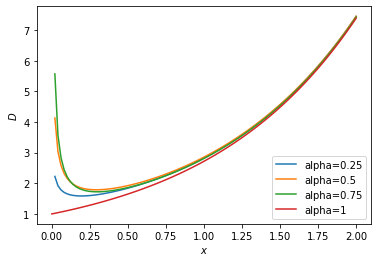

In [78]:
# x = 0 - special point (warnings)
from scipy import integrate

x = np.linspace(0, 2, 100)
for alpha in [0.25,0.5,0.75]:
    integral = np.array([integrate.quad(lambda t: t**(-alpha)*np.exp(-t), 0, xi+1e-18)[0] for xi in x])
    plt.plot(x, (x**(-alpha) + np.exp(x)*integral) / special.gamma(1 - alpha), label=f'alpha={alpha}')

plt.plot(x, np.exp(x), label=f'alpha=1')
plt.xlabel('$x$')
plt.ylabel('$D$')
plt.legend()
plt.show()